#  8. Morfologické operácie

In [33]:
import numpy as np
from skimage import data, filters, draw
import matplotlib.pyplot as plt

from skimage.morphology import disk

In [35]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'

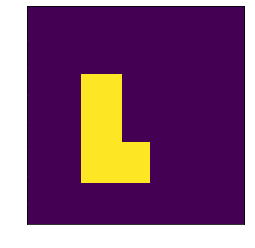

In [37]:
I = np.zeros((16,16),dtype=np.bool)
rr, cc = draw.rectangle((5, 4), extent=(5, 3), shape=I.shape)
I[rr, cc] = True
rr, cc = draw.rectangle((10, 4), extent=(3, 5), shape=I.shape)
I[rr, cc] = True
backup = I
plt.imshow(I)

In [39]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
SE_o = np.array([2, 0])

In [42]:
eroded_I = np.zeros(I.shape)
dilated_I = np.zeros(I.shape)
I = np.pad(I,
           ((SE_o[0], SE_o[0]),(SE_o[1],SE_o[1])),
           mode='constant',
           constant_values=((False, False), (False, False)))

In [44]:
for i in range(SE_o[0], I.shape[0] - SE_o[0]):
    for j in range(SE_o[1], I.shape[1]- SE_o[1]):
        crop = I[i-SE_o[0]: i-SE_o[0]+SE.shape[0], j-SE_o[1]:j-SE_o[1]+SE.shape[1]]

        and_result = np.logical_and(crop,
                                    SE)
        erosion_test = np.sum(and_result) == np.sum(SE)
        dilation_test = np.sum(and_result) > 0

        eroded_I[i-SE_o[0],j-SE_o[1]] = erosion_test

        dilated_I[i-SE_o[0],j-SE_o[1]] = dilation_test

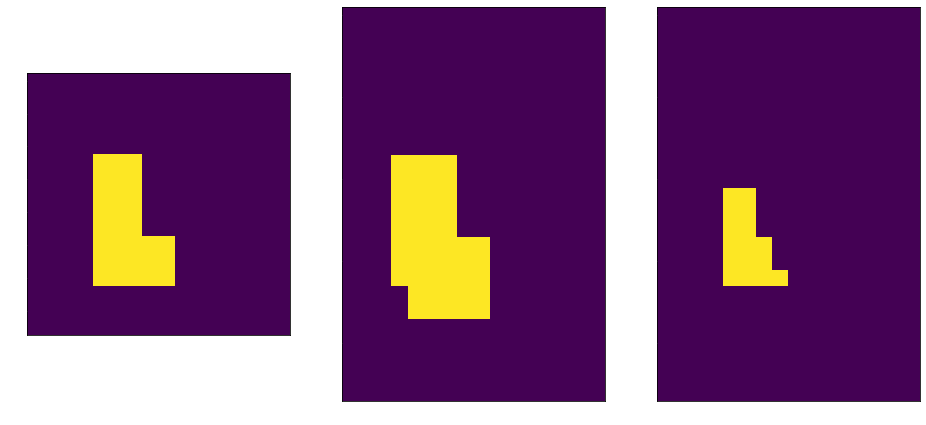

In [46]:
plt.figure(figsize=(16,10))
plt.subplot(131)
plt.imshow(backup)
plt.subplot(132)
plt.imshow(dilated_I)
plt.subplot(133)
plt.imshow(eroded_I)

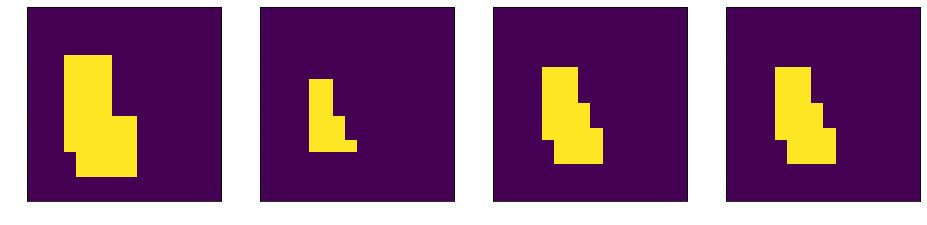

In [48]:
from skimage import morphology
#selem = morphology.selem.rectangle(3,2)

dilated_I = morphology.dilation(backup,SE)
eroded_I = morphology.erosion(backup,SE)
closed_I = morphology.closing(backup,SE)
open_I = morphology.opening(backup,SE)
plt.figure(figsize=(16,10))
plt.subplot(141)
plt.imshow(dilated_I)
plt.subplot(142)
plt.imshow(eroded_I)
plt.subplot(143)
plt.imshow(closed_I)
plt.subplot(144)
plt.imshow(open_I)

## Real world problem

Text(0.5, 1.0, 'Otsu thresh binary mask base on blue channel')

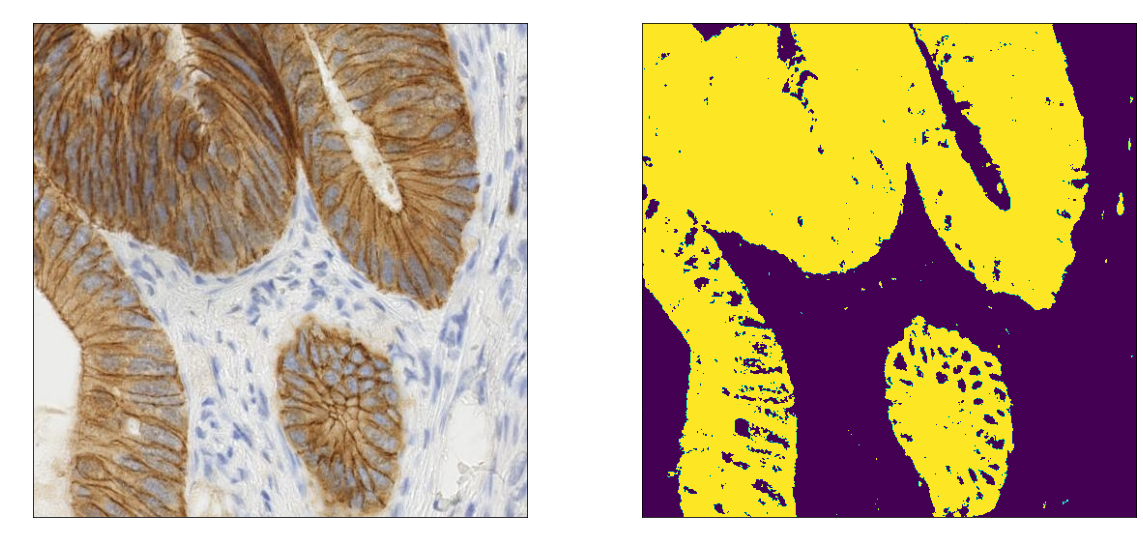

In [51]:
I3 =data.immunohistochemistry()

plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.imshow(I3)
plt.title('Image')
plt.subplot(222)
B = I3[:,:,2]
out  = filters.threshold_otsu(B)
up = B<out
plt.imshow(up)
plt.title('Otsu thresh binary mask base on blue channel')

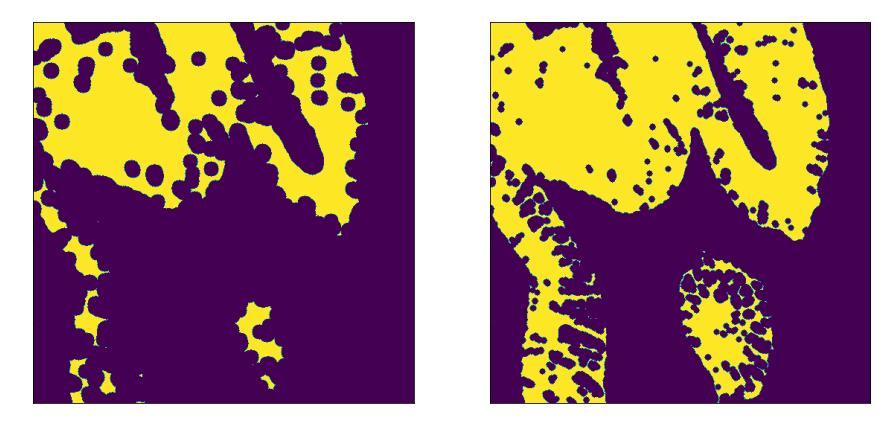

In [54]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Erosion 10 px disk')
plt.imshow(morphology.erosion(up,morphology.disk(10)))
plt.subplot(122)
plt.title('Erosion 4 px disk')
plt.imshow(morphology.erosion(up,morphology.disk(4)))

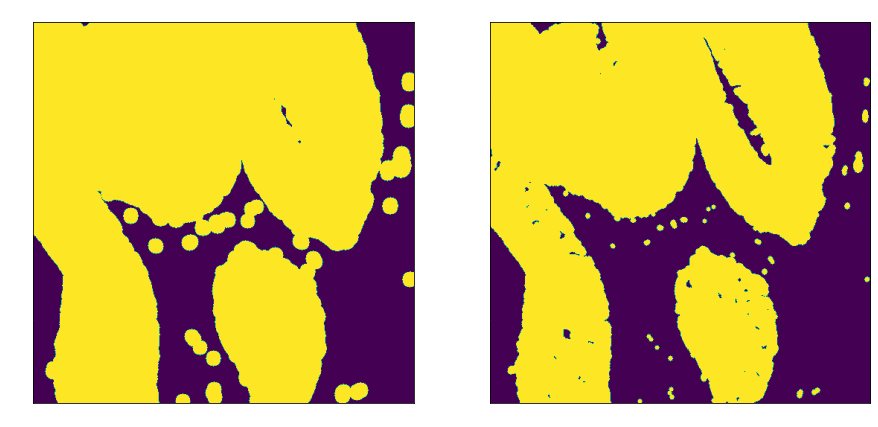

In [56]:
plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.title('Dilation 10 px disk')
plt.imshow(morphology.dilation(up,morphology.disk(10)))
plt.subplot(122)
plt.title('Dilation 2 px disk')
plt.imshow(morphology.dilation(up,morphology.disk(3)))

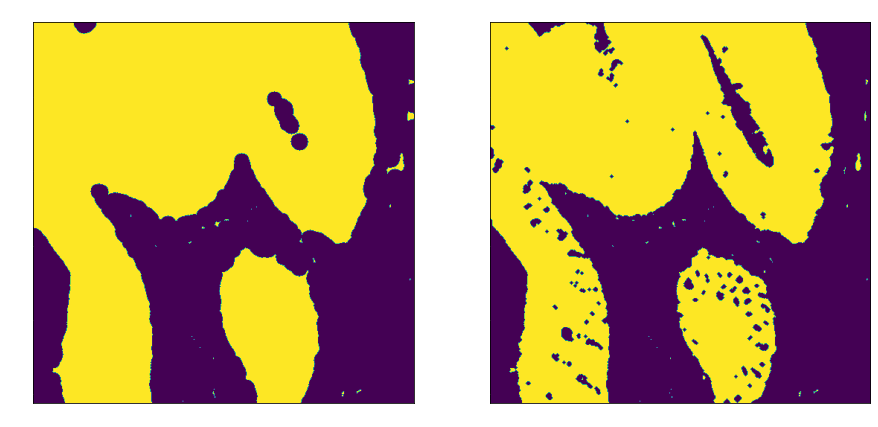

In [59]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Closing 10 px disk')
plt.imshow(morphology.closing(up,morphology.disk(10)))
plt.subplot(122)
plt.title('Closing 2 px disk')
plt.imshow(morphology.closing(up,morphology.disk(2)))

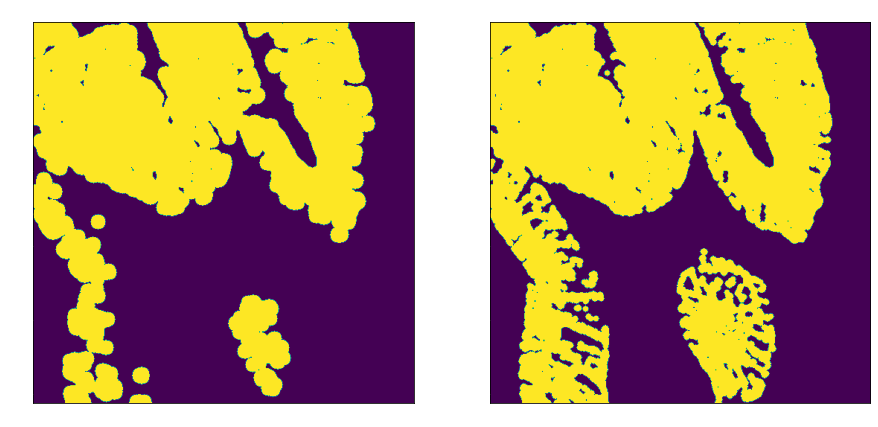

In [61]:
plt.figure(figsize=(15, 10))

plt.subplot(121)
plt.title('Opening 10 px disk')
plt.imshow(morphology.opening(up,morphology.disk(10)))
plt.subplot(122)
plt.title('Opening 2 px disk')
plt.imshow(morphology.opening(up,morphology.disk(4)))

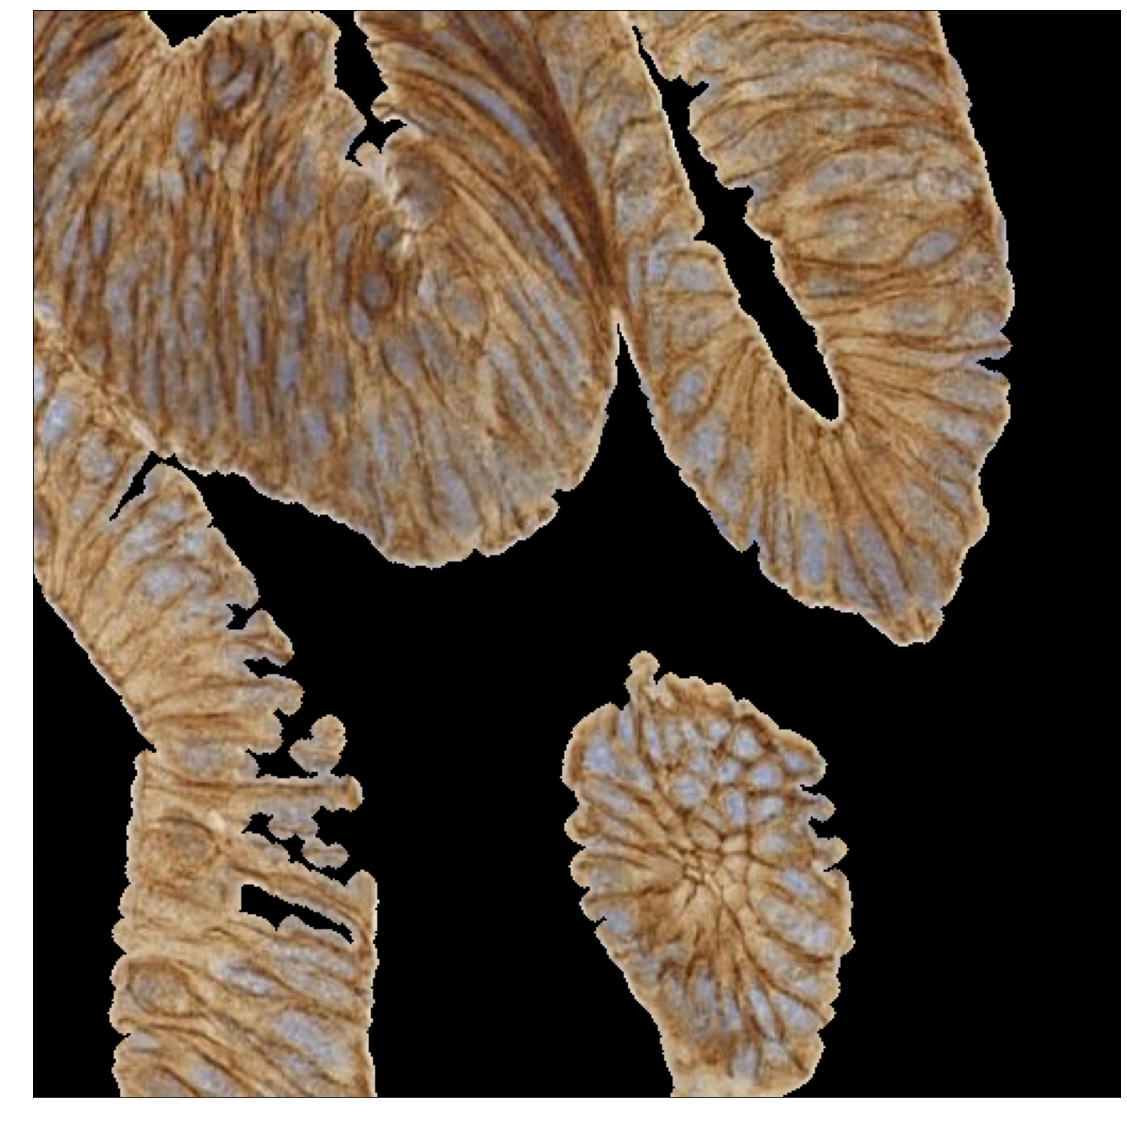

In [63]:
plt.figure(figsize=(20, 20))
mask_final = morphology.remove_small_holes(morphology.dilation(morphology.opening(up,morphology.disk(4)),morphology.disk(2)),256)
plt.imshow(I3 * np.dstack((mask_final,mask_final,mask_final)),cmap='gray')

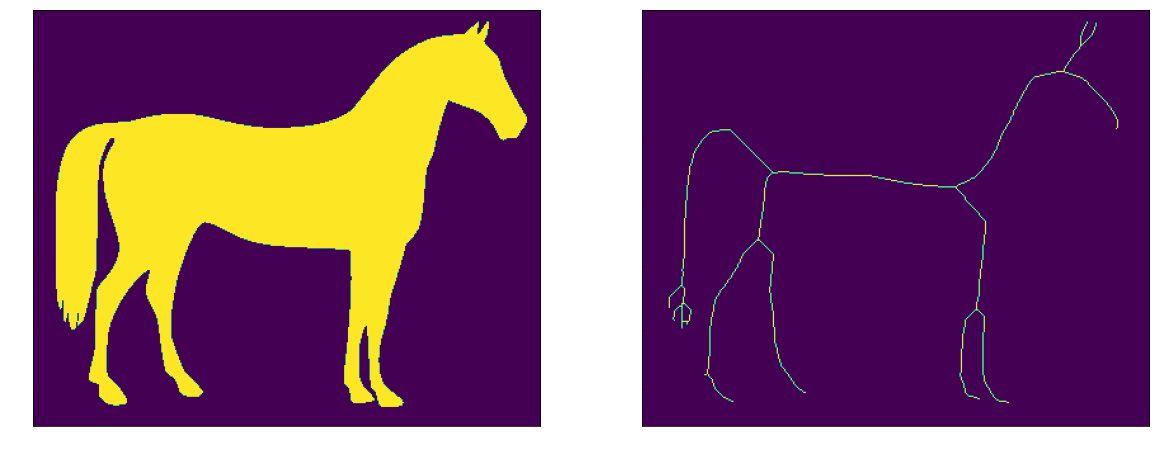

In [65]:
plt.figure(figsize=(20,15))
I = data.horse() == False
plt.subplot(121)
plt.imshow(I)
plt.subplot(122)
plt.imshow(morphology.skeletonize(I))

# Dokoncit cvicenie  54 - 57

Text(0.5, 1.0, 'Skeleton')

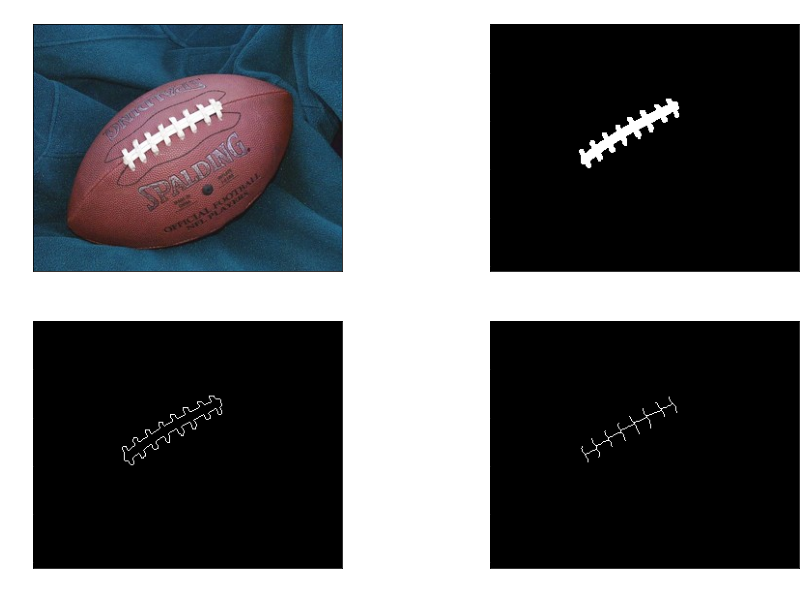

In [72]:
from skimage.color import rgb2gray

I = plt.imread("imgs/football.jpg")
I_g = rgb2gray(I)
up = ((I_g*255).astype(np.uint8)) > 170
upo = morphology.opening(up, morphology.square(3))
upe = morphology.erosion(upo,morphology.disk(1))
upoe = np.logical_xor(upo, upe)
last = morphology.skeletonize(upo)
plt.figure(figsize=(15,10))
plt.subplot(221)
plt.imshow(I)
plt.title("Original image",fontsize='x-large')
plt.subplot(222)
plt.imshow(upo,cmap='gray')
plt.title("BW",fontsize='x-large')
plt.subplot(223)
plt.imshow(upoe,cmap='gray')
plt.title("BW - erosion",fontsize='x-large')
plt.subplot(224)
plt.imshow(last,cmap='gray')
plt.title("Skeleton",fontsize='x-large')

In [73]:
SE = np.array([[1, 0],[1, 0],[1, 1]])
I = (np.random.random((5,5))*25).astype(np.int)
print("Original matrix:")
print(I)
I1 = morphology.dilation(I, SE)
print("Dilation:")
print(I1)
I2 = morphology.erosion(I, SE)
print("Erosion:")
print(I2)

Original matrix:
[[ 5  6 17 15 24]
 [ 5  7 21  7 18]
 [10 17  6 21 11]
 [ 1  3 23 10 15]
 [18 18 16  0 22]]
Dilation:
[[ 7 21 21 18 24]
 [17 17 21 21 24]
 [10 23 23 21 18]
 [18 18 23 22 22]
 [18 18 23 22 22]]
Erosion:
[[ 5  6  7  7 18]
 [ 5  6  6  7 11]
 [ 1  3  6  7 11]
 [ 1  3  0  0 11]
 [ 1  3  0  0 15]]


Text(0.5, 1.0, 'Pixels changed using bwareaopen')

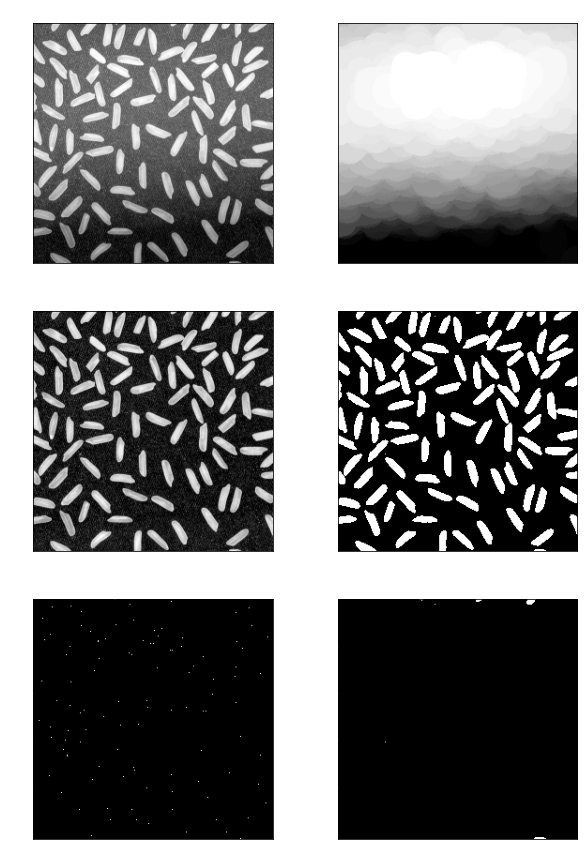

In [70]:
I = plt.imread("imgs/rice.png")
background = morphology.opening(I, morphology.disk(15))
I1 = I - background
thresh = filters.threshold_otsu(I1)
I2 = ~(I1 < thresh)
I3 = morphology.opening(I2, morphology.disk(1))
I4 = morphology.remove_small_objects(I2,50)

plt.figure(figsize=(10, 15))
plt.subplot(321)
plt.imshow(I,cmap='gray')
plt.title("Original image",fontsize='x-large')
plt.subplot(322)

plt.imshow(background,cmap='gray')
plt.title("Background",fontsize='x-large')
plt.subplot(323)

plt.imshow(I1,cmap='gray')
plt.title("Separated background",fontsize='x-large')
plt.subplot(324)

plt.imshow(I2,cmap='gray')
plt.title("Thresholded image",fontsize='x-large')
plt.subplot(325)

plt.imshow(np.logical_xor(I3, I2),cmap='gray')
plt.title("Pixels changed using opening",fontsize='x-large')
plt.subplot(326)

plt.imshow(np.logical_xor(I4, I2), cmap='gray')
plt.title("Pixels changed using bwareaopen",fontsize='x-large')